In [1]:
!pip uninstall -y tensorflow
!pip uninstall -y tensorflow-datasets
!pip install tensorflow-gpu==1.14.0
!pip install tensorflow-datasets==1.2.0

Uninstalling tensorflow-2.3.0:
  Successfully uninstalled tensorflow-2.3.0
Uninstalling tensorflow-datasets-4.0.1:
  Successfully uninstalled tensorflow-datasets-4.0.1
     |████████████████████████████████| 377.0MB 44kB/s 
     |████████████████████████████████| 3.2MB 49.0MB/s 
     |████████████████████████████████| 491kB 55.5MB/s 
     |████████████████████████████████| 51kB 8.2MB/s 
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
     |████████████████████████████████| 2.3MB 15.5MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/My Drive/1210_dtd_ig-master')

In [4]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

from model import Model

In [5]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
model = Model(sess)

In [6]:
model.train(num_epoch=1)


Checkpoint at epoch 1

---------------
Checkpoint is saved to ./checkpoint/mnist.



In [7]:
model.test()


---------------
Checkpoint at ./checkpoint/ is restored.


---------------
Accuracy: 97.83



In [8]:
images, heatmaps_dtd = model.explain(method='dtd', num_visualize=50)


---------------
Checkpoint at ./checkpoint is restored.



In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def visualize_heatmap(image, heatmap):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    axes[0].set_title('original image')
    axes[0].axis('off')
    im1 = axes[0].imshow(image.squeeze(2), cmap='gray')
    
    axes[1].set_title('heatmap')
    axes[1].axis('off')
    im2 = axes[1].imshow(heatmap.squeeze(2), cmap='Reds')
    divider = make_axes_locatable(axes[1])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im2, cax=cax, orientation='vertical')
    
    fig.show()

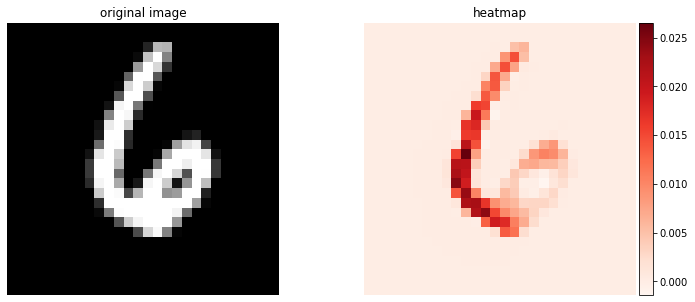

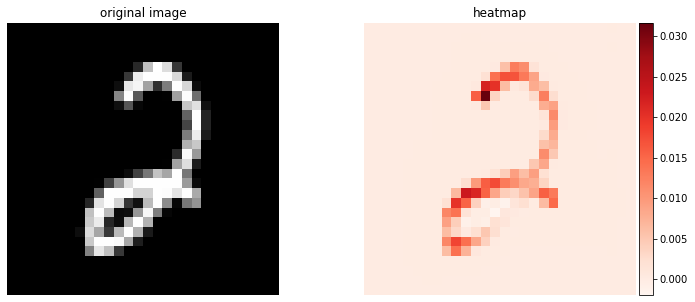

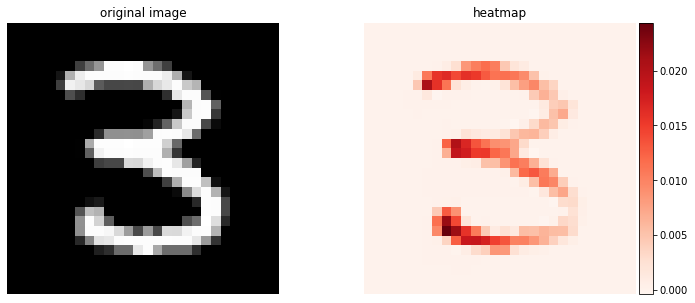

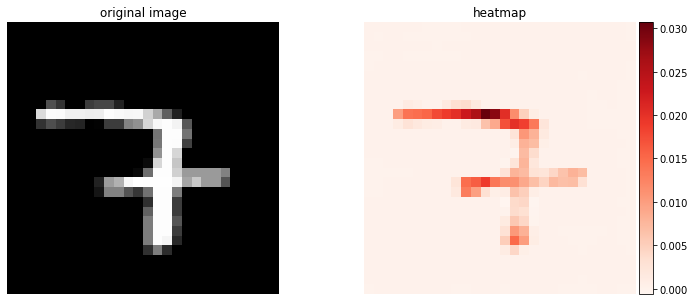

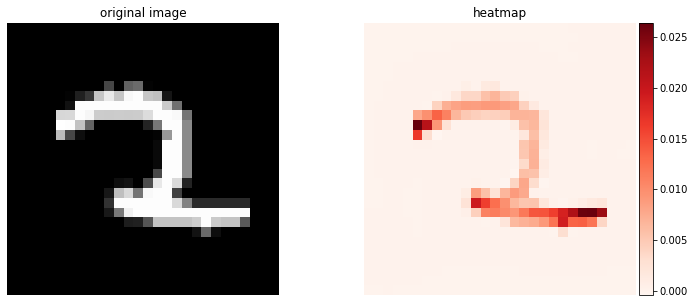

In [10]:
for i in range(5):
    visualize_heatmap(images[i], heatmaps_dtd[i])

In [11]:
images, heatmaps_integrated = model.explain(method='integrated', num_visualize=50)


---------------
Checkpoint at ./checkpoint is restored.



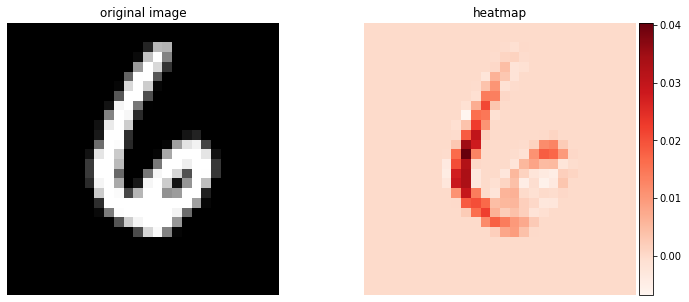

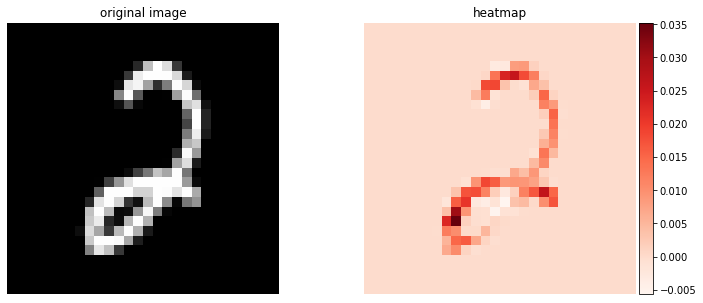

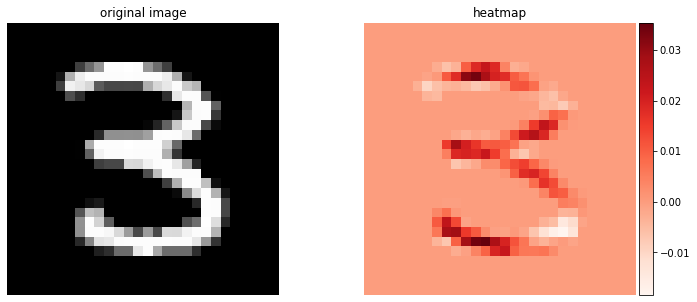

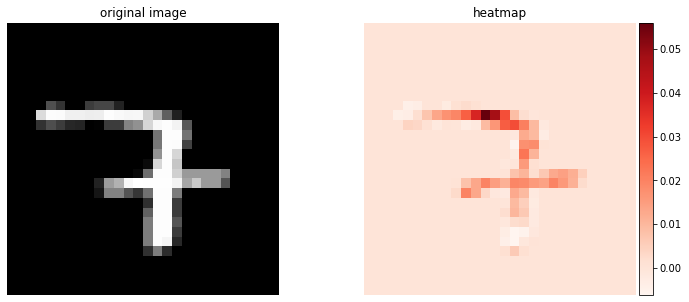

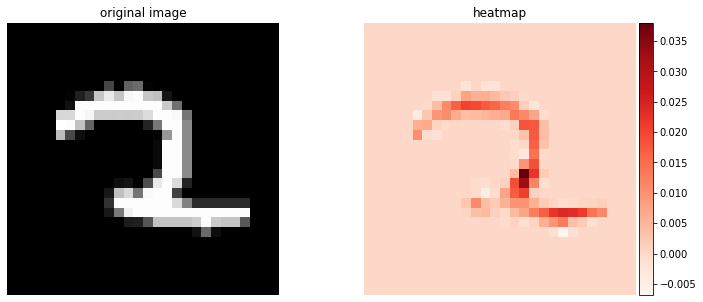

In [12]:
for i in range(5):
    visualize_heatmap(images[i], heatmaps_integrated[i])

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def visualize_heatmap_all(image, heatmap_dtd, heatmap_integrated):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    axes[0].set_title('original image')
    axes[0].axis('off')
    im1 = axes[0].imshow(image.squeeze(2), cmap='gray')
    
    axes[1].set_title('Deep Taylor Decomposition')
    axes[1].axis('off')
    im2 = axes[1].imshow(heatmap_dtd.squeeze(2), cmap='Reds')
    divider = make_axes_locatable(axes[1])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im2, cax=cax, orientation='vertical')

    axes[2].set_title('Integrated Gradients')
    axes[2].axis('off')
    im3 = axes[2].imshow(heatmap_integrated.squeeze(2), cmap='Reds')
    divider = make_axes_locatable(axes[2])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im3, cax=cax, orientation='vertical')

    fig.show()

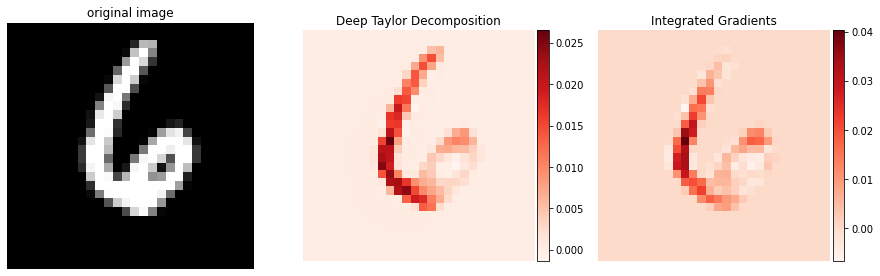

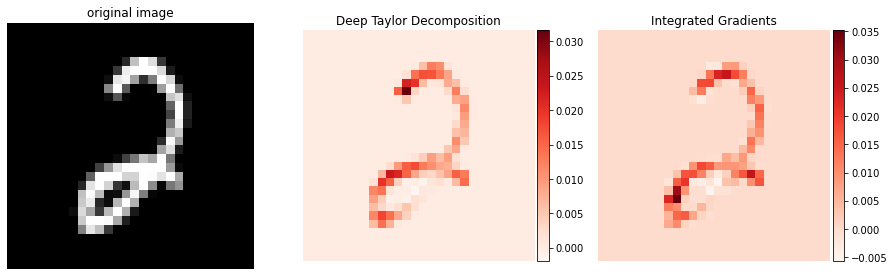

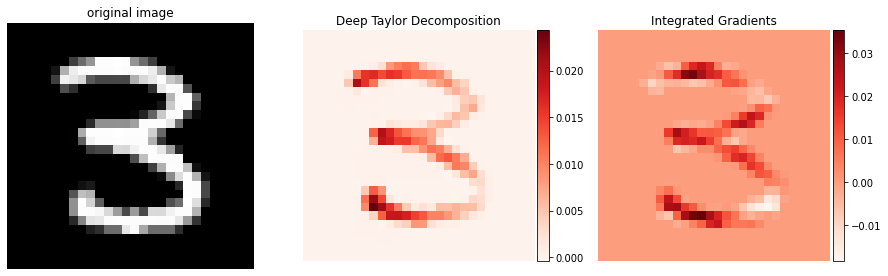

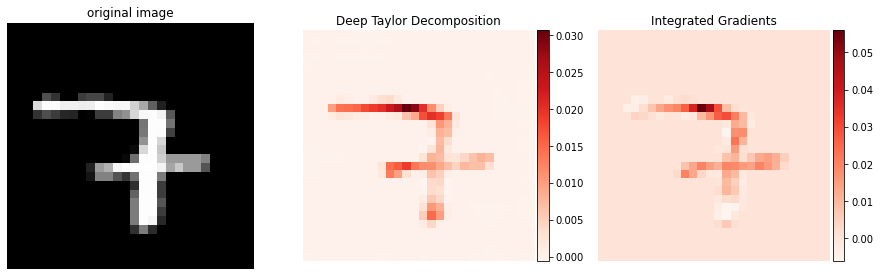

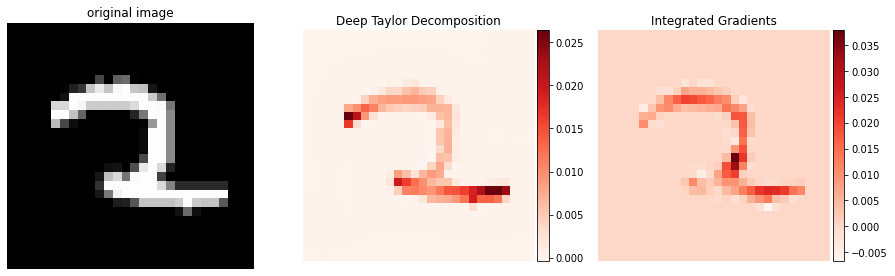

In [14]:
for i in range(5):
    visualize_heatmap_all(images[i], heatmaps_dtd[i], heatmaps_integrated[i])